In [1]:

import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import sklearn
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.naive_bayes import GaussianNB 
from sklearn import metrics 
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyClassifier

df = pd.read_csv('Credit_informations.csv', sep=";")

print (df)



        loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  installment  \
0            5000         5000           4975.0     1     10.65       162.87   
1            2500         2500           2500.0     2     15.27        59.83   
2            2400         2400           2400.0     1     15.96        84.33   
3           10000        10000          10000.0     1     13.49       339.31   
4            3000         3000           3000.0     2     12.69        67.79   
...           ...          ...              ...   ...       ...          ...   
461092      18400        18400          18400.0     2     14.47       432.64   
461093      22000        22000          22000.0     2     19.97       582.50   
461094      20700        20700          20700.0     2     16.99       514.34   
461095       2000         2000           2000.0     1      7.90        62.59   
461096      10000        10000           9975.0     1     19.20       367.58   

        grade  home_ownership  annual_i

In [2]:
from sklearn.model_selection import StratifiedShuffleSplit
y = df['good_bad']
df = df.drop('good_bad', axis=1)
#print (df)
df = df.dropna(axis=0,how='any')
print(df.isnull().sum())
print (y.sum())
print (df)
X_train_stratified, X_test_stratified, y_train_stratified, y_test_stratified = train_test_split(df, y, test_size=.2, shuffle=True)
print(y_test_stratified.sum())




X_train_stratified = np.asarray(X_train_stratified).astype(np.float32)
X_test_stratified = np.asarray(X_test_stratified).astype(np.float32)
y_train_stratified = np.asarray(y_train_stratified).astype(np.float32)
y_test_stratified = np.asarray(y_test_stratified).astype(np.float32)





loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
pymnt_plan                     0
purpose                        0
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                     0
total_acc                      0
initial_list_status            0
out_prncp                      0
total_pymnt_inv                0
total_rec_prncp                0
total_rec_int                  0
total_rec_

In [3]:
# Import `Sequential` from `keras.models`
from tensorflow.keras.models import Sequential

# Import `Dense` from `keras.layers`
from tensorflow.keras.layers import Dense,Dropout, Flatten

# Initialize the constructor
model = Sequential()

# Add an input layer 
model.add(Dense(20, activation='relu', input_shape=(43,)))

# Add one hidden layer 
model.add(Dense(40, activation='relu'))
model.add(Dense(80, activation='relu'))
#model.add(Dropout(0.27))


# Add an output layer 
model.add(Flatten())
model.add(Dense(40, activation='relu'))
#model.add(Dropout(0.27))
model.add(Dense(1, activation='sigmoid'))

In [4]:
from tensorflow.keras.optimizers import Adam
Adam(
   learning_rate = 0.000005)

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
                   
history = model.fit(X_train_stratified, y_train_stratified,epochs=7, batch_size=50,validation_data=(X_test_stratified, y_test_stratified))
tx = model.history.history['loss']
ty = model.history.history['accuracy']
txx = model.history.history['val_loss']
tyy = model.history.history['val_accuracy']

Epoch 1/7
7378/7378 [==============================] - 8s 998us/step - loss: 2.0203 - accuracy: 0.9517 - val_loss: 0.1268 - val_accuracy: 0.9774
Epoch 2/7
7378/7378 [==============================] - 9s 1ms/step - loss: 0.1368 - accuracy: 0.9748 - val_loss: 0.0943 - val_accuracy: 0.9793
Epoch 3/7
7378/7378 [==============================] - 8s 1ms/step - loss: 0.1078 - accuracy: 0.9777 - val_loss: 0.0918 - val_accuracy: 0.9800
Epoch 4/7
7378/7378 [==============================] - 8s 1ms/step - loss: 0.0904 - accuracy: 0.9797 - val_loss: 0.0914 - val_accuracy: 0.9804
Epoch 5/7
7378/7378 [==============================] - 7s 889us/step - loss: 0.0871 - accuracy: 0.9801 - val_loss: 0.0747 - val_accuracy: 0.9815
Epoch 6/7
7378/7378 [==============================] - 7s 960us/step - loss: 0.0831 - accuracy: 0.9804 - val_loss: 0.0901 - val_accuracy: 0.9798
Epoch 7/7
7378/7378 [==============================] - 7s 934us/step - loss: 0.0790 - accuracy: 0.9808 - val_loss: 0.0769 - val_accuracy

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


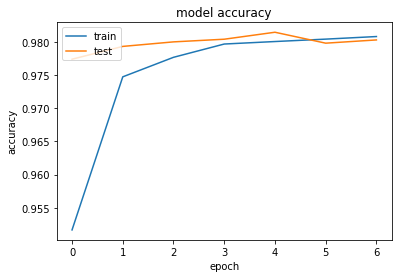

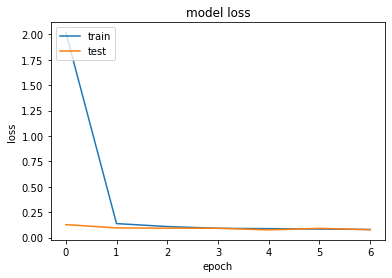

In [5]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [6]:
y_pred = model.predict(X_test_stratified)
print(y_pred)

[[9.8894346e-01]
 [9.9383402e-01]
 [9.5958424e-01]
 ...
 [9.9500585e-01]
 [9.9013543e-01]
 [1.4357259e-13]]


In [7]:
score = model.evaluate(X_test_stratified, y_test_stratified)

print(score)

2882/2882 [==============================] - 2s 525us/step - loss: 0.0769 - accuracy: 0.9803
[0.07693663984537125, 0.9803187847137451]


0.9782400684234656


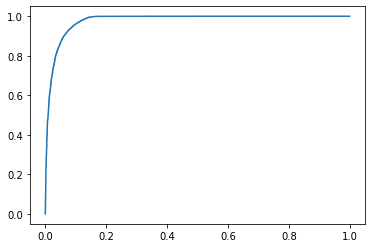

In [8]:
auc = metrics.roc_auc_score(y_test_stratified, y_pred)
print(auc)
fpr, tpr, threshold = metrics.roc_curve(y_test_stratified, y_pred,drop_intermediate=False)
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr)

In [9]:
dummy_clf = DummyClassifier(strategy='stratified')
dummy_clf.fit(X_train_stratified,y_train_stratified)

y_pred_dummy = dummy_clf.predict(X_test_stratified)
aucc = metrics.roc_auc_score(y_test_stratified, y_pred_dummy)
print(aucc)

0.500065138544727


In [10]:
from sklearn.metrics import confusion_matrix
y_pred = np.where(y_pred < 0.5, 0, 1)
actual = y_test_stratified
predicted = y_pred
print(y_pred)
conf_mat = confusion_matrix(y_test_stratified,y_pred) 
print(conf_mat)

[[1]
 [1]
 [1]
 ...
 [1]
 [1]
 [0]]
[[ 8318  1768]
 [   47 82087]]


In [11]:
model.save("my_model")

INFO:tensorflow:Assets written to: my_model\assets
